<a href="https://colab.research.google.com/github/Ivanas02/Modulo_Mineria_Datos/blob/main/TEyMD_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEyMD P3**

- ***Jesús Iván Hernández Rivera***

*Importamos las librerías necesarias para elaborar el notebook*

In [ ]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt

## **Ejercicio 1**

1. *Supongamos que los valores de un conjunto determinado de datos se agrupan en intervalos. Los intervalos y las frecuencias correspondientes son los siguientes:*



|Edad| Frecuencia|
|-|-|
|1-5|	600|
|5-15|	900|
|15-20|	1900|
|20-50|	850|
|50-80|	450|
|80-110|	85|


***Calcular un valor medio aproximado para los datos.***

Para la realización de este problema enunciamos la tabla como un data frame dentro del entorno de Python.

In [ ]:
df = pd.DataFrame({"Edad": ['1-5','5-15','15-20','20-50','50-80','80-110'],
                   'Frecuencia': [600,900,1900,850,450,85]})
df

,Edad,Frecuencia
0,1-5,600
1,5-15,900
2,15-20,1900
3,20-50,850
4,50-80,450
5,80-110,85


Procedemos a extraer los límites establecidos para cada intervalo de edad, dado que más adelante nos servirán para obtener el resultado al que se quiere llegar.

In [ ]:
# Separar los límites inferior y superior de la columna "Edad"
df[['Limite_Inferior', 'Limite_Superior']] = df['Edad'].str.split('-', expand=True)

# Convertir los límites a enteros para que sean de tipo numérico
df['Limite_Inferior'] = df['Limite_Inferior'].astype(int)
df['Limite_Superior'] = df['Limite_Superior'].astype(int)

df

,Edad,Frecuencia,Limite_Inferior,Limite_Superior
0,1-5,600,1,5
1,5-15,900,5,15
2,15-20,1900,15,20
3,20-50,850,20,50
4,50-80,450,50,80
5,80-110,85,80,110


Para la estimación del valor medio aproximado seguiremos los siguientes pasos:
- Obtenemos la marca de clase (valor medio) para cada uno de los rangos de edad.

$$Marca \ de \ clase = \frac{Límite \  superior + Límite \ inferior}{2}$$

- Multiplicamos la marca de clase por su frecuencia absoluta en cada intervalo.
- Dividimos la suma obtenida por el total de datos (suma de la frecuencia por intervalo).


In [ ]:
# Calculamos el valor medio por intervalo
df['Valor_Medio'] = (df['Limite_Inferior'] + df['Limite_Superior']) / 2
df

,Edad,Frecuencia,Limite_Inferior,Limite_Superior,Valor_Medio
0,1-5,600,1,5,3.0
1,5-15,900,5,15,10.0
2,15-20,1900,15,20,17.5
3,20-50,850,20,50,35.0
4,50-80,450,50,80,65.0
5,80-110,85,80,110,95.0


In [ ]:
# Multiplicamos el valor medio por la frecuencia
df['Medio_Frecuencia'] = df['Valor_Medio'] * df['Frecuencia']
df

,Edad,Frecuencia,Limite_Inferior,Limite_Superior,Valor_Medio,Medio_Frecuencia
0,1-5,600,1,5,3.0,1800.0
1,5-15,900,5,15,10.0,9000.0
2,15-20,1900,15,20,17.5,33250.0
3,20-50,850,20,50,35.0,29750.0
4,50-80,450,50,80,65.0,29250.0
5,80-110,85,80,110,95.0,8075.0


Realizamos el cálculo e imprimimos el resultado.

In [ ]:
# Obtenemos el valor de la edad media
edad_media = df['Medio_Frecuencia'].sum() / df['Frecuencia'].sum()
print(f"La edad media es: {edad_media:.2f}")

La edad media es: 23.22


## **Ejercicio 2**

2. *Supongamos que los datos para el análisis incluyen el atributo de Edad. Los valores de la edad para las tuplas de datos son (en orden creciente) 12, 15, 16, 16, 19,19, 20, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 34, 35, 35, 35, 35, 36, 36,40, 45, 46, 51, 70, 72, 77*

a. ***¿Cuál es la media de los datos? ¿Cuál es la mediana?***

En primera instancia calculamos la media de los datos utilizando funciones establecidas en python.

In [ ]:
# Generamos la lista con los valores de las tuplas
lista = [12, 15, 16, 16, 19,19, 20, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33,
         34, 35, 35, 35, 35, 36, 36,40, 45, 46, 51, 70, 72, 77]

# Calculamos la media
media = np.mean(lista)

print(f"La media es: {media}")

La media es: 32.25


Despues, calculamos la mediana de los datos utilizando funciones establecidas en python.

In [ ]:
# Calculamos la mediana
mediana = stats.median(lista)

print(f"La mediana es: {mediana}")

La mediana es: 27.5


b. ***¿Cuál es la moda de los datos?***

Calculamos la moda de los datos utilizando funciones establecidas en python.

In [ ]:
# Calculamos la moda
moda = stats.mode(lista)

print(f"La moda es: {moda}")

La moda es: 25


c. ***Utilice la normalización min-max para transformar el valor 44 de la antigüedad en el intervalo [0.0,1.0].***

Pocedemos a normalizar el valor *44* de la siguiente manera

$$norm=\frac{44-min_{edad}}{max_{edad}-min_{edad}}$$

In [ ]:
# Normalizamos el valor 44
norm = (44 - min(lista)) / (max(lista) - min(lista))

print(f"El valor normalizado es: {norm}")

El valor normalizado es: 0.49230769230769234


d. ***Trazar un histograma de equi-distancia de longitud 8***

Un histograma de equi-distancia es un gráfico que muestra los intervalos y las frecuencias de los datos a la misma distancia. Cada intervalo tiene el mismo tamaño (de ahí el término "equi-distancia"), y la longitud 8 significa que cada bin abarca 8 unidades del atributo que se está midiendo (como la edad en este caso).

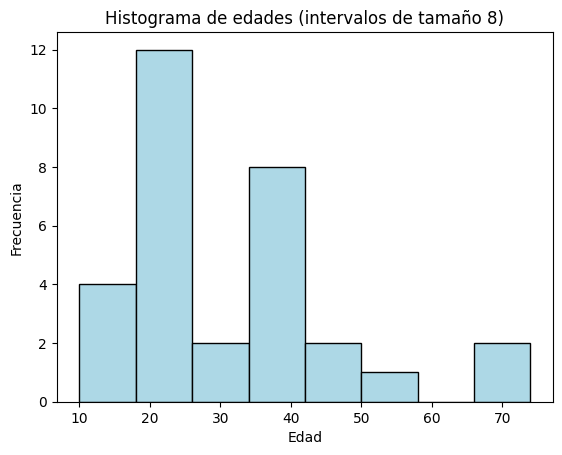

In [ ]:
# Crear histograma con bins de tamaño 8
plt.hist(lista, bins=range(10, 81, 8), edgecolor='black', color='lightblue')

# Añadir título y etiquetas
plt.title('Histograma de edades (intervalos de tamaño 8)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar histograma
plt.show()


## **Ejercicio 3**

3.  *Supongamos que un hospital probó los datos de edad y grasa corporal para 18 adultos seleccionados al azar con el siguiente resultado*

|Edad|% Grasa|
|-|-|
|22|9.5|
|23|26.5|
|27|7.7|
|27|18.8|
|39|31.4|
|42|25.9|
|47|27.5|
|49|27.2|
|50|31.3|
|52|34.5|
|54|42.5|
|54|28.9|
|56|33.5|
|57|30.2|
|59|34.1|
|59|33.3|
|62|41.4|
|66|35.7|

a. ***Calcule la media, la mediana y la desviación estándar de la edad y % Grasa.***

Definimos un data frame con la información de la tabla anterior.

In [ ]:
# Definimos el data frame
df2 = pd.DataFrame({"Edad": [22,23,27,27,39,42,47,49,50,52,54,54,56,57,59,
                             59,62,66],
                    "%_Grasa": [9.5,26.5,7.7,18.8,31.4,25.9,27.5,27.2,31.3,
                                34.5,42.5,28.9,33.5,30.2,34.1,33.3,41.4,35.7]})
df2

,Edad,%_Grasa
0,22,9.5
1,23,26.5
2,27,7.7
3,27,18.8
4,39,31.4
5,42,25.9
6,47,27.5
7,49,27.2
8,50,31.3
9,52,34.5


Calculamos las medidas requeridas mediante funciones establecidas en el lenguaje de programación, tanto para la edad como para el % de grasa de cada individuo dentro de la tabla.

In [ ]:
# Calculamos la media para la edad
media_edad = np.mean(df2["Edad"])

# Calculamos la mediana para la edad
mediana_edad = stats.median(df2["Edad"])

# Calculamos la desviación estándar para la edad
desviacion_edad = np.std(df2["Edad"])

# Imprimimos los resultados
print(f"La media de la edad es: {media_edad:.4f}")
print(f"La mediana de la edad es: {mediana_edad}")
print(f"La desviación estándar de la edad es: {desviacion_edad:.4f}")

La media de la edad es: 46.9444
La mediana de la edad es: 51.0
La desviación estándar de la edad es: 13.5009


In [ ]:
# Calculamos la media para el % de grasa
media_grasa = np.mean(df2["%_Grasa"])

# Calculamos la mediana para el % de grasa
mediana_grasa = stats.median(df2["%_Grasa"])

# Calculamos la desviación estándar para el % de grasa
desviacion_grasa = np.std(df2["%_Grasa"])

# Imprimimos los resultados
print(f"La media del % de grasa es: {media_grasa:.4f}")
print(f"La mediana del % de grasa es: {mediana_grasa}")
print(f"La desviación estándar del % de grasa es: {desviacion_grasa:.4f}")

La media del % de grasa es: 28.8833
La mediana del % de grasa es: 30.75
La desviación estándar del % de grasa es: 8.9675


b. ***Grafica el diagrama de dispersión***

Graficamos un diagrama de dispersión entre los datos de las edades y del porcentaje de grasa que se observaron.

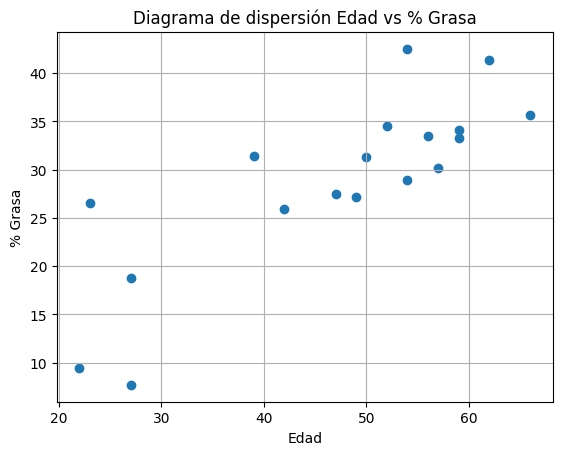

In [ ]:
# Diagrama de dispersión
plt.scatter(df2["Edad"], df2["%_Grasa"])
plt.xlabel("Edad")
plt.ylabel("% Grasa")
plt.title("Diagrama de dispersión Edad vs % Grasa")
plt.grid(True)
plt.show()

c. ***Normaliza los datos de Edad y % Grasa***

Procedemos a normalizar la edad y el % de grasa de la siguiente manera

$$col[A_j]=\frac{col[A_j]-min_{Aj}}{max_{Aj}-min_{Aj}}$$

In [ ]:
# Normaliza la edad
df2["Edad_Normalizada"] = (df2["Edad"] - df2["Edad"].min()) / (df2["Edad"].max() - df2["Edad"].min())

# Normaliza el % Grasa
df2["%_Grasa_Normalizada"] = (df2["%_Grasa"] - df2["%_Grasa"].min()) / (df2["%_Grasa"].max() - df2["%_Grasa"].min())

df2

,Edad,%_Grasa,Edad_Normalizada,%_Grasa_Normalizada
0,22,9.5,0.000000,0.051724
1,23,26.5,0.022727,0.540230
2,27,7.7,0.113636,0.000000
3,27,18.8,0.113636,0.318966
4,39,31.4,0.386364,0.681034
5,42,25.9,0.454545,0.522989
6,47,27.5,0.568182,0.568966
7,49,27.2,0.613636,0.560345
8,50,31.3,0.636364,0.678161
9,52,34.5,0.681818,0.770115


d. ***Calcula y explica el coeficiente de correlación de Pearson***

Obtenemos el coeficiente de correlación de Pearson tanto para los datos normales como para los datos normalizados, se realiza mediante *corrcoef* la función de *numpy*

In [ ]:
# Calculamos el coeficiente de correlación de Pearson
correlacion = np.corrcoef(df2["Edad"], df2["%_Grasa"])

print(f"El coeficiente de correlación de Pearson es: {correlacion[0, 1]:.4f}")

El coeficiente de correlación de Pearson es: 0.8154


In [ ]:
# Calculamos el coeficiente de correlación de Pearson
correlacion = np.corrcoef(df2["Edad_Normalizada"], df2["%_Grasa_Normalizada"])

print(f"El coeficiente de correlación de Pearson es: {correlacion[0, 1]:.4f}")

El coeficiente de correlación de Pearson es: 0.8154


Un valor de ***0.8154*** implica que las dos variables tienen una relación lineal fuerte y que cambios en una de ellas probablemente estarán acompañados por cambios en la otra en la misma dirección.

## **Ejercicio 4**

4. *Sean las tuplas: $X_1=(7,2)$ y $X_2=(4,8)$. Encuentre la distancia utilizando:*

a. ***Distancia máxima***

Sabemos que la *Distancia Máxima (Distancia Chebyshev)* se obtiene de la siguiente manera:

\begin{align*}
d(X_i,X_j) &= max_p|x_{ip}-x_{jp}| \\
&= max_p(|x_1-x_2|,|y_1-y_2|)
\end{align*}

Aplicamos los valores para cada una de las tuplas:

\begin{align*}
d(X_1,X_2) &= max_p(|x_1-x_2|,|y_1-y_2|) \\
&= max_p(|7-4|,|2-8|) \\
&= max_p(3,6) \\
&= 6
\end{align*}

Automatizamos este proceso.


b. ***Distancia de Manhattan***

La distancia de Manhattan es la suma de las diferencias absolutas entre las coordenadas:

\begin{align*}
d(X_i,X_j) &= \sum_p|x_{ip}-x_{jp}|
\end{align*}

Sustituimos los valores para cada una de las tuplas

\begin{align*}
d(X_1,X_2) &= \sum_p|x_{ip}-x_{jp}| \\
&= |x_1-x_2|+|y_1-y_2| \\
&= |7-4|+|2-8| \\
&= 3+6 \\
&= 9
\end{align*}

c. ***Distancia Euclidiana***

La distancia euclidiana es la raíz cuadrada de la suma de los cuadrados de las diferencias:

\begin{align*}
d(X_i,X_j) &= \sqrt{\sum_p(x_{ip}-x_{jp})^2}
\end{align*}

Sustituimos los valores para cada una de las tuplas

\begin{align*}
d(X_1,X_2) &= \sqrt{\sum_p(x_{ip}-x_{jp})^2} \\
&= \sqrt{(x_1-x_2)^2+(y_1-y_2)^2} \\
&= \sqrt{(7-4)^2+(2-8)^2} \\
&= \sqrt{3^2+(-6)^2} \\
&= \sqrt{9+36} \\
&= \sqrt{45}\\
&≈ 6.71
\end{align*}

***Representación gráfica***

<ipython-input-17-d8b377a9bf28>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([X1[0], X1[0]], [X1[1], X2[1]], 'k-', color='purple', label='Distancia Máxima')  # Línea vertical
<ipython-input-17-d8b377a9bf28>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([X1[0], X2[0]], [X2[1], X2[1]], 'k--', color='purple')  # Línea horizontal
<ipython-input-17-d8b377a9bf28>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  plt.plot([X1[0], X2[0]], [X1[1], X1[1]], 'b:', label='Distancia Manhattan', color='orange')  # Línea horizontal
<ipython-input-17-d8b377a9bf28>:16: UserWarning: color is redundantly defined by the 'color' keyword argument a

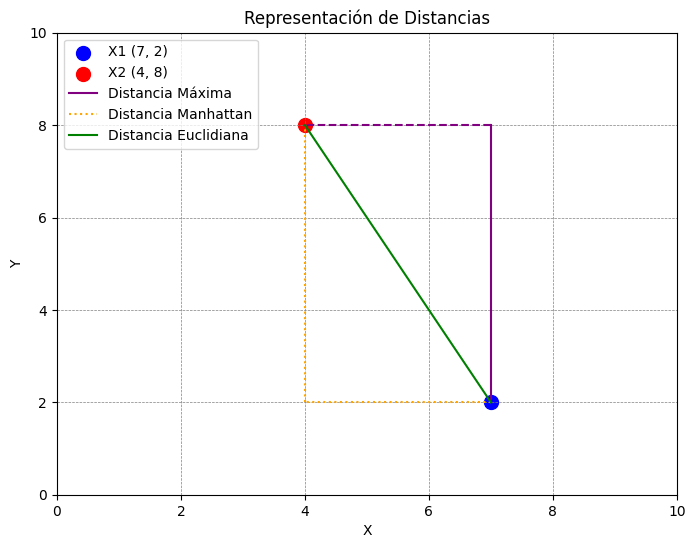

In [ ]:
# Generamos las tuplas
X1 = np.array([7, 2])
X2 = np.array([4, 8])

# Crear figura
plt.figure(figsize=(8, 6))
plt.scatter(*X1, color='blue', label='X1 (7, 2)', s=100)
plt.scatter(*X2, color='red', label='X2 (4, 8)', s=100)

# Distancia máxima
plt.plot([X1[0], X1[0]], [X1[1], X2[1]], 'k-', color='purple', label='Distancia Máxima')  # Línea vertical
plt.plot([X1[0], X2[0]], [X2[1], X2[1]], 'k--', color='purple')  # Línea horizontal

# Distancia de Manhattan
plt.plot([X1[0], X2[0]], [X1[1], X1[1]], 'b:', label='Distancia Manhattan', color='orange')  # Línea horizontal
plt.plot([X2[0], X2[0]], [X1[1], X2[1]], 'b:', color='orange')  # Línea vertical

# Distancia euclidiana
plt.plot([X1[0], X2[0]], [X1[1], X2[1]], 'g-', label='Distancia Euclidiana')  # Línea recta

# Configurar gráfico
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Representación de Distancias')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## **Ejercicio 5**

5. Cálculo de distancias, atributos categóricos. Sea la siguiente tabla de datos

|ID|Color_ojos|Sexo|Edad|
|-|-|-|-|
|1|Café|F|25|
|2|Negro|M|22|
|3|Azul|F|29|
|4|Negro|M|26|
|5|Café|F|23|
|6|Verde|M|29|
|7|Negro|M|27|
|**8**|**Café**|**M**|**23**|

*NOTA: Mis datos estan en **negritas**.*

b. ***Utilizando distancia Euclidiana, encuentre la distancia entre las tuplas 1 y 4***

La distancia euclidiana es la raíz cuadrada de la suma de los cuadrados de las diferencias:

\begin{align*}
d(X_i,X_j) &= \sqrt{\sum_p(x_{ip}-x_{jp})^2}
\end{align*}

**NOTA:** En este ejercicio tenemos datos categóricos, donde si son iguales, la distancia es 0, si son diferentes la distancia es 1.

Sustituimos los valores para cada una de las tuplas.

\begin{align*}
d(X_1,X_4) &= \sqrt{\sum_p(x_{ip}-x_{jp})^2} \\
&= \sqrt{(x_{1,2}-x_{4,2})^2+(x_{1,3}-x_{4,3})^2+(x_{1,4}-x_{4,4})^2} \\
&= \sqrt{(Cafe-Negro)^2+(F-M)^2+(25-26)^2} \\
&= \sqrt{1^2+1^2+(-1)^2} \\
&= \sqrt{1+1+1} \\
&= \sqrt{3}\\
&≈ 1.732
\end{align*}

c. ***Utilizando distancia Euclidiana, encuentre la distancia entre las tuplas 2 y 8***

La distancia euclidiana es la raíz cuadrada de la suma de los cuadrados de las diferencias:

\begin{align*}
d(X_i,X_j) &= \sqrt{\sum_p(x_{ip}-x_{jp})^2}
\end{align*}

Sustituimos los valores para cada una de las tuplas

\begin{align*}
d(X_2,X_8) &= \sqrt{\sum_p(x_{ip}-x_{jp})^2} \\
&= \sqrt{(x_{2,2}-x_{8,2})^2+(x_{2,3}-x_{8,3})^2+(x_{2,4}-x_{8,4})^2} \\
&= \sqrt{(Negro-Cafe)^2+(M-M)^2+(22-23)^2} \\
&= \sqrt{1^2+0^2+(-1)^2} \\
&= \sqrt{1+0+1} \\
&= \sqrt{2}\\
&≈ 1.414
\end{align*}

d. ***Realiza lo mismo con la distancia de Manhattan y Mahalanobis***

- **Manhattan**

La distancia de Manhattan es la suma de las diferencias absolutas entre las coordenadas:

\begin{align*}
d(X_i,X_j) &= \sum_p|x_{ip}-x_{jp}|
\end{align*}

*Tuplas 1 y 4*

Sustituimos los valores para cada una de las tuplas

\begin{align*}
d(X_1,X_4) &= \sum_p|x_{1p}-x_{4p}| \\
&= |x_{1,2}-x_{4,2}|+|x_{1,3}-x_{4,3}|+|x_{1,4}-x_{4,4}| \\
&= |Cafe-Negro|+|F-M|+|25-26| \\
&= |1|+|1|+|-1| \\
&= 3
\end{align*}

*Tuplas 2 y 8*

Sustituimos los valores para cada una de las tuplas

\begin{align*}
d(X_2,X_8) &= \sum_p|x_{1p}-x_{4p}| \\
&= |x_{2,2}-x_{8,2}|+|x_{2,3}-x_{8,3}|+|x_{2,4}-x_{8,4}| \\
&= |Negro-Cafe|+|M-M|+|22-23| \\
&= |1|+|0|+|-1| \\
&= 2
\end{align*}

- **Mahalanobis**

*Tuplas 1 y 4*

Obetenemos el vector con las distancias entre cada uno de los valores de las tuplas.

$$(Cafe-Negro,F-M,25-26)=(1,1,-1)$$

In [ ]:
# Creamos el vector anterior
vector = np.array([1,1,-1])

# Obtenemos la matriz de varianzas del vector anterior
cov1 = np.var([1,1])
cov2 = np.var([1,-1])

matriz = np.array([[0,cov1,cov2],[cov1,0,cov2],[cov1,cov2,0]])
matriz

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

Una vez encontrada la matriz de varianzas y covarianzas, procedemos a calcular la distancia de *Mahalanobis* multiplicando

$$(1,1,-1)\cdot Matriz_{cov}\cdot (1,1,-1)^T$$

In [ ]:
# Obtenemos la distancia de Mahalanobis
dist = np.dot(np.dot(vector,matriz),vector.T)

print(f"La distancia de Mahalanobis es: {dist}")

La distancia de Mahalanobis es: -3.0


*Tuplas 2 y 8*

Obetenemos el vector con las distancias entre cada uno de los valores de las tuplas.

$$(Negro-Cafe,M-M,22-23)=(1,0,-1)$$

In [ ]:
# Creamos el vector anterior
vector = np.array([1,0,-1])

# Obtenemos la matriz de varianzas del vector anterior
cov1 = np.var([1,0])
cov2 = np.var([1,-1])
cov3 = np.var([0,-1])

matriz = np.array([[0,cov1,cov2],[cov1,0,cov3],[cov2,cov3,0]])
matriz

array([[0.  , 0.25, 1.  ],
       [0.25, 0.  , 0.25],
       [1.  , 0.25, 0.  ]])

Una vez encontrada la matriz de varianzas y covarianzas, procedemos a calcular la distancia de *Mahalanobis* multiplicando

$$(1,0,-1)\cdot Matriz_{cov}\cdot (1,0,-1)^T$$

In [ ]:
# Obtenemos la distancia de Mahalanobis
dist = np.dot(np.dot(vector,matriz),vector.T)

print(f"La distancia de Mahalanobis es: {dist}")

La distancia de Mahalanobis es: -2.0


e. ***Normaliza la edad***

Creamos el dataframe con los datos del ejercicio, para poder realizar la normalización de la edad apoyandonos del lenguaje de programación Python.

In [ ]:
# definimos el dataframe
df3 = pd.DataFrame({"ID": [1,2,3,4,5,6,7,8],
                    "Color_ojos": ["Café","Negro","Azul","Negro","Café","Verde","Negro","Café"],
                    "Sexo": ["F","M","F","M","F","M","M","M"],
                    "Edad": [25,22,29,26,23,29,27,23]})
df3

,ID,Color_ojos,Sexo,Edad
0,1,Café,F,25
1,2,Negro,M,22
2,3,Azul,F,29
3,4,Negro,M,26
4,5,Café,F,23
5,6,Verde,M,29
6,7,Negro,M,27
7,8,Café,M,23


Ahora si, procedemos a normalizar la edad de la siguiente manera

$$col[A_j]=\frac{col[A_j]-min_{Aj}}{max_{Aj}-min_{Aj}}$$

In [ ]:
# Normalizamos la edad
df3["Edad_Normalizada"] = (df3["Edad"] - df3["Edad"].min()) / (df3["Edad"].max() - df3["Edad"].min())
df3

,ID,Color_ojos,Sexo,Edad,Edad_Normalizada
0,1,Café,F,25,0.428571
1,2,Negro,M,22,0.000000
2,3,Azul,F,29,1.000000
3,4,Negro,M,26,0.571429
4,5,Café,F,23,0.142857
5,6,Verde,M,29,1.000000
6,7,Negro,M,27,0.714286
7,8,Café,M,23,0.142857


## **Ejercicio 6**

6. *Con los datos anteriores*
- *Calcula/genera la matriz de correlación de datos. Concluye tus resultados.*
- *Elaborar un modelo de regresión lineal. Concluye tus resultados*

Para la realización de este ejercicio, vamos a representar las variables categóricas por medio de números, tanto para el *color de ojos* como para el *sexo*, de la siguiente manera

|Color|Representación|
|-|-|
|Café|1|
|Negro| 2|
|Azul|3|
|Verde|4|

|Sexo|Representación|
|-|-|
|F|0|
|M|1|

In [ ]:
# Mapa de reemplazo para el color de ojos
ey_color = {'Café': 1, 'Negro': 2, 'Azul': 3, 'Verde': 4}

# Reemplazar los colores por números
df3['Color_ojos'] = df3['Color_ojos'].map(ey_color)

# Mapa de reemplazo para el sexo
sex = {'F': 0, 'M': 1}

# Reemplazar los colores por números
df3['Sexo'] = df3['Sexo'].map(sex)

df3

,ID,Color_ojos,Sexo,Edad,Edad_Normalizada
0,1,1,0,25,0.428571
1,2,2,1,22,0.000000
2,3,3,0,29,1.000000
3,4,2,1,26,0.571429
4,5,1,0,23,0.142857
5,6,4,1,29,1.000000
6,7,2,1,27,0.714286
7,8,1,1,23,0.142857


In [ ]:
# Poner 'ID' como índice
df3.set_index('ID', inplace=True)

# Borramos la edad normalizada
df3.drop('Edad_Normalizada', axis=1, inplace=True)
df3

,Color_ojos,Sexo,Edad
ID,,,
1,1,0,25
2,2,1,22
3,3,0,29
4,2,1,26
5,1,0,23
6,4,1,29
7,2,1,27
8,1,1,23


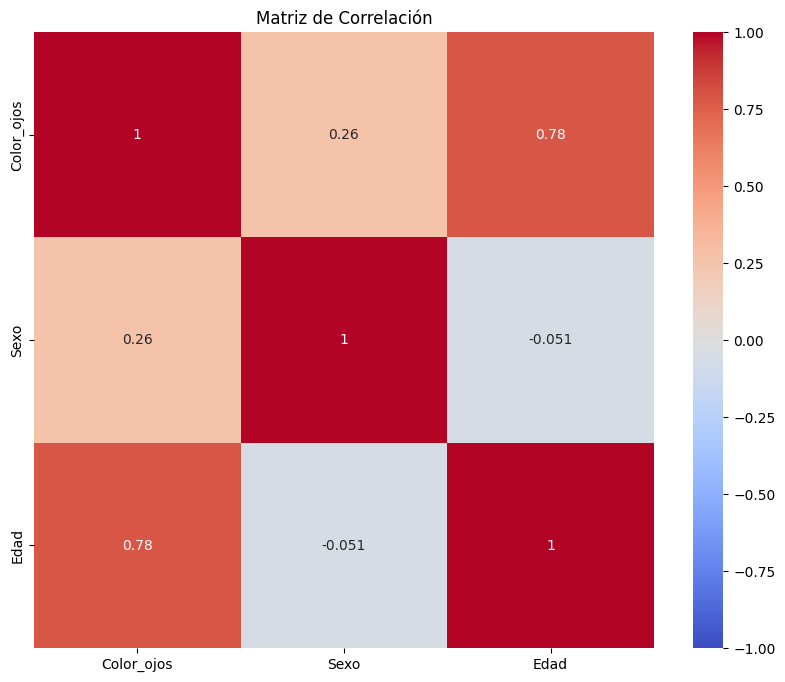

In [ ]:
# Calculamos la matriz
matriz_correlacion = df3.corr()

# Visualizar la matriz de correlación
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Con respecto a la matriz de correlación anteriormente generada, podemos observar que se presenta una correlación "positiva" entre *color de ojos* y *edad*, es decir cuando una variable aumenta la otra tambien tiende a aumentar. Así mismo, identificamos una correlación nula entre *edad* y *sexo*, esto significa que los cambios en una variable no pueden predecir los cambios en la otra.

Para el modelo de regresión lineal, trataremos de modelar la **edad** conforme al *color de ojos* y al *sexo* de cada uno de los individuos que se encuentran dentro de la tabla del ejercicio anterior.

In [ ]:
# Importamos librerias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definimos las variables
X = df3[['Color_ojos', 'Sexo']] # Posibles variables explicativas
y = df3['Edad'] # Variable respuesta

# Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("Error cuadrático medio (MSE):", mse)

Coeficientes del modelo: [3.125 0.375]
Intercepto: 19.75
Error cuadrático medio (MSE): 12.265625


De la salida anterior, obtuvimos el siguiente modelo

$$y_{edad}=19.75+3.125\cdot x_{ojos}+0.375 \cdot x_{sexo}$$

- El coeficiente para la variable $x_{ojos}$ quiere decir que por cada incremento en el valor del color de ojos (es decir, cambiar de un color a otro con un número mayor en la codificación), se espera que la edad aumente en 3.125 años. Esto sugiere que las personas con colores de ojos de mayor valor en la codificación tienden a ser mayores.

- El coeficiente para la variable $x_{sexo}$ interpreta que por cada incremento (que la persona observada sea hombre) aumenta la edad predicha en 0.375 años en comparación con ser mujer, observando que los hombres tienden a ser ligeramente mayores que las mujeres en este conjunto de datos.

Observamos las edades predichas de las siguientes personas que entren a la tabla informativa.

In [ ]:
# Predicciones
y_pred

array([26.375, 32.625, 22.875])